# 📉 Week 3: Stress Testing – Portfolio PnL under Volatility Shock
Simulates how a portfolio behaves when market volatility doubles.

### 🧾 Assumptions
- Portfolio Value: ₹10 lakh
- Normal Return: 12% annual
- Normal Volatility: 20%
- Stress Volatility: 40% (doubled)
- Time Horizon: 1 year (252 trading days)
- Simulations: 10,000 paths

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Portfolio parameters
initial_value = 10_00_000  # ₹10 lakh
mu = 0.12
sigma = 0.20
days = 252
simulations = 10000

# Normal market returns
normal_returns = np.random.normal(loc=mu / days, scale=sigma / np.sqrt(days), size=(simulations, days))
normal_pnl = initial_value * (np.exp(normal_returns.sum(axis=1)) - 1)

# Stress scenario - double volatility
stress_sigma = sigma * 2
stress_returns = np.random.normal(loc=mu / days, scale=stress_sigma / np.sqrt(days), size=(simulations, days))
stress_pnl = initial_value * (np.exp(stress_returns.sum(axis=1)) - 1)

### 🔍 Insights
- Normal market gives tighter distribution of outcomes.
- Stressed volatility results in much wider PnL swings.
- The **VaR loss** increases heavily in the stressed scenario.


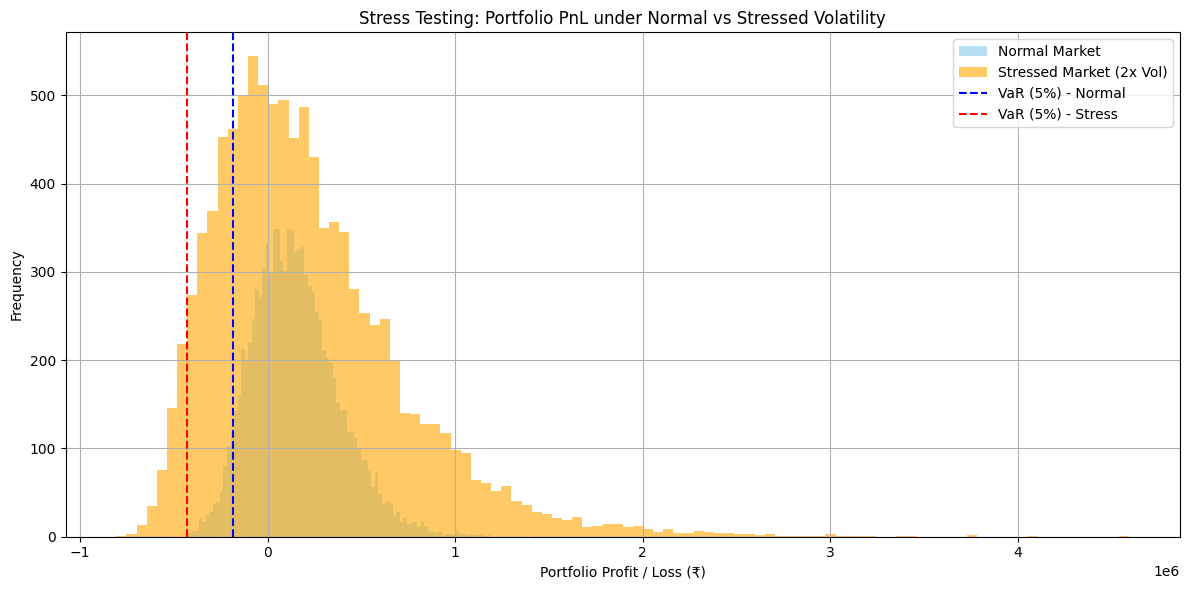

In [2]:
# Plot PnL under both scenarios
plt.figure(figsize=(12, 6))
plt.hist(normal_pnl, bins=100, alpha=0.6, label='Normal Market', color='skyblue')
plt.hist(stress_pnl, bins=100, alpha=0.6, label='Stressed Market (2x Vol)', color='orange')
plt.axvline(x=np.percentile(normal_pnl, 5), color='blue', linestyle='dashed', label='VaR (5%) - Normal')
plt.axvline(x=np.percentile(stress_pnl, 5), color='red', linestyle='dashed', label='VaR (5%) - Stress')
plt.title('Stress Testing: Portfolio PnL under Normal vs Stressed Volatility')
plt.xlabel('Portfolio Profit / Loss (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()